# Analisis de Datos de usuarios Ice 2016
### Realizado por: Erika Sanchez

### Etapa 1: Estudiar informacion general sobre el Dadaframe "Juegos"

In [52]:
#importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#cargar y leer DataFrame
juegos= pd.read_csv("games.csv")

In [3]:
#Estudiar informacion general
juegos.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



In [4]:
print(juegos.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

### Etapa 2: Pre alistar o preparar los datos para el analisis posterior 

In [5]:
#corregir errores
#reemplazar nombres de columnas en minuscula
juegos.columns = [col.lower() for col in juegos.columns]
print(juegos.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
#ajustar los tipos de datos de las columnas del DF
#Year_of_Release a tipo fecha 
juegos["year_of_release"]=pd.to_datetime(juegos["year_of_release"], format="%Y")
juegos["year_of_release"]=juegos["year_of_release"].dt.year
#convertir valores no validos como "tbd" en NAN para poder cambiar el tipo de columna "user_score" a float 
juegos["user_score"] = pd.to_numeric(juegos["user_score"], errors="coerce")
juegos["user_score"]=juegos["user_score"].astype("float")
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
<div class="alert alert-block alert-success">
<b>Comentar

De acuerdo con la investigacion realizada de los datos, aplicando el metodo info() al DF de "juegos", se pudo observar que era necesario por Buenas practicas "snake_case" convertir los nombres de las columnas del DF en minusculas y realizar ajustes en las columnas "year_of_release" y "user_score" de tipo de datos que contienen. Lo anterior se realiza para poder dejar los datos listos y depurados y asi no tener erroes o sezgos a la hora de realizar el analisis. 

In [7]:
#identificar varlores ausentes 
print(juegos.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [8]:
#gestion de valores ausentes 
#columna "name" y "genre" eliminar filas con valores ausentes ya que son muy pocos y no son significativos
juegos.dropna(subset=["name", "genre"], inplace=True)

#columna "year_of_release", con fechas de lanzamiento. Se eliminan los valores nulos ya que solo representan el 1.6% aprox de los datos y el analisis requiere esta columna
juegos.dropna(subset=["year_of_release"], inplace=True)

#columnas "critic_score", "user_score" y "rating", tienen aprox el 50% de los valores ausentes por lo que se deben rellenar
mediana_critic_score=juegos["critic_score"].median()
media_critic_score=juegos["critic_score"].mean()
print("para la columna critic_score estas son las mediana y la media: ", mediana_critic_score, media_critic_score)

#como la media y la mediana estan cerca, se puede interpretar que no hay valores atipicos en la distribucion, por lo que elijo la media para reemplazar
juegos["critic_score"]=juegos["critic_score"].fillna(media_critic_score)

mediana_user_score=juegos["user_score"].median()
media_user_score=juegos["user_score"].mean()
print("para la columna user_score estas son las mediana y la media: ", mediana_critic_score, media_critic_score)

#como la media y la mediana son casi la misma, se puede interpretar que no hay valores atipicos en la distribucion, por lo que elijo la media para reemplazar
juegos["user_score"]=juegos["user_score"].fillna(media_user_score)

#columna "rating" no tiene sentido realizar operaciones ya que es categorica, se reemplazan valores ausentes por la moda ya que son muchos no se pueden eliminar
juegos["rating"].fillna(juegos["rating"].mode()[0], inplace=True)

#comprobar que los valores ausentes se hayan gestionado
print(juegos.isna().sum())

para la columna critic_score estas son las mediana y la media:  71.0 68.99436302142053
para la columna user_score estas son las mediana y la media:  71.0 68.99436302142053
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


En la anterior celda de codigo explico en comentarios como y porque se gestionaron los valores usentes identificados. 
Posiblemente se encuentran ausentes los valores porque se encontraban en proceso de calificacion.

In [9]:
#calcular ventas totales e incluir columna nueva "ventas_totales"
juegos["ventas_totales"]= juegos["na_sales"]+juegos["eu_sales"]+juegos["jp_sales"]+juegos["other_sales"]
print(juegos.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45     76.000000     8.00000      E   
1      3.58      6.81         0.77     68.994363     7.12633      E   
2     12.76      3.79         3.29     82.000000     8.30000      E   
3     10.93      3.28         2.95     80.000000     8.00000      E   
4      8.89     10.22         1.00     68.994363     7.12633      E   

   ventas_totales  
0           82.54  
1           40.24  
2           35.52  
3     

### Etapa 3: Analizar datos

In [10]:
#cuantos juegos fueron lanzados por año 
juegos_xaño=juegos.groupby("year_of_release")["name"].count().sort_values(ascending=False)
print(juegos_xaño)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: name, dtype: int64


**Se observa que despues del año 2000 el numero de videojuegos que se lanzaron empezo a tener una tendencia creciente y tuvo un crecimiento significativo**

In [11]:
#ventas totales por plataforma 
ventas_xplataforma=juegos.groupby("platform")["ventas_totales"].sum().sort_values(ascending=False)
ventas_xplataforma=ventas_xplataforma.reset_index()
#identificar principales plataformas con base en sus volumenes de ventas segun el principio de pareto 
suma=ventas_xplataforma["ventas_totales"].sum()
ventas_xplataforma["porcentaje_pareto"]=(ventas_xplataforma["ventas_totales"]/suma)*100
# Calcular el porcentaje acumulado
ventas_xplataforma["acumulado"] = ventas_xplataforma["porcentaje_pareto"].cumsum()
print(ventas_xplataforma)

   platform  ventas_totales  porcentaje_pareto   acumulado
0       PS2         1233.56          13.994874   13.994874
1      X360          961.24          10.905374   24.900248
2       PS3          931.34          10.566155   35.466403
3       Wii          891.18          10.110535   45.576939
4        DS          802.78           9.107628   54.684566
5        PS          727.58           8.254475   62.939042
6       PS4          314.14           3.563953   66.502995
7       GBA          312.88           3.549658   70.052653
8       PSP          289.53           3.284750   73.337402
9       3DS          257.81           2.924883   76.262285
10       PC          255.76           2.901625   79.163911
11       GB          254.43           2.886536   82.050447
12       XB          251.57           2.854089   84.904537
13      NES          251.05           2.848190   87.752727
14      N64          218.01           2.473347   90.226074
15     SNES          200.04           2.269476   92.4955

**Las principales plataformas segun el principio de pareto (donde se concentran el 80% de las ventas) son las primeras 11 plataformas**

In [12]:
#distribucion de ventas de plataformas por año 
ventas_xplataforma_xaño=juegos.groupby(["platform", "year_of_release"])["ventas_totales"].sum().sort_values(ascending=False).reset_index()
print(ventas_xplataforma_xaño)

#Plataformas muertas y activas
#Filtrar los últimos 3 años con datos reales
ultimos_3_años = juegos["year_of_release"].dropna().sort_values().unique()[-3:]

#Filtrar el DataFrame con esos años
ventas_ultimos_3 = ventas_xplataforma_xaño[ventas_xplataforma_xaño["year_of_release"].isin(ultimos_3_años)]

#Obtener todas las plataformas existentes
todas_plataformas = juegos["platform"].unique()

#Obtener las plataformas que **sí** tuvieron ventas en los últimos 3 años
plataformas_activas = ventas_ultimos_3["platform"].unique()
print("Plataformas que QUE SI tienen ventas:", plataformas_activas)

#Las que no están en esa lista, están "muertas"
plataformas_muertas = [p for p in todas_plataformas if p not in plataformas_activas]

print("Plataformas que YA NO tienen ventas:", plataformas_muertas)

#Agrupar por plataforma y obtener año mínimo y máximo de ventas
ciclo_vida = juegos.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()

#Calcular duración del ciclo de vida
ciclo_vida["duracion"] = ciclo_vida["max"] - ciclo_vida["min"] + 1  # +1 para incluir ambos extremos

#Mostrar el ciclo de vida por plataforma
print(ciclo_vida.sort_values("duracion", ascending=False))

#Calcular el promedio del ciclo de vida de todas las plataformas
promedio_ciclo = ciclo_vida["duracion"].mean()
print(f"\n⏳ Ciclo de vida promedio de las plataformas: {promedio_ciclo:.2f} años")

    platform  year_of_release  ventas_totales
0        PS2           2004.0          211.81
1        Wii           2009.0          206.97
2        PS2           2002.0          205.38
3        PS2           2003.0          184.31
4        Wii           2008.0          171.32
..       ...              ...             ...
233       PC           1988.0            0.03
234     PCFX           1996.0            0.03
235       DC           2007.0            0.02
236      3DO           1994.0            0.02
237       DS           1985.0            0.02

[238 rows x 3 columns]
Plataformas que QUE SI tienen ventas: ['PS4' 'XOne' 'PS3' '3DS' 'X360' 'WiiU' 'PC' 'PSV' 'Wii' 'PSP']
Plataformas que YA NO tienen ventas: ['NES', 'GB', 'DS', 'PS2', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
   platform     min     max  duracion
13       PC  1985.0  2016.0      32.0
4        DS  1985.0  2013.0      29.0
5        GB  1988.0  2001.0 

Con la informaciòn anterior se concluye que se deben tomar en cuenta los datos de los ultimos 3 años (2013 a 2016) para proyectar el año 2017, ya que: 
-incluyen las plataformas mas actuales (PS4, XOne, 3DS, PSV, WiiU).
-Un contexto más realista de las tendencias actuales de ventas y menor riesgo de incluir plataformas muertas o desactualizadas.

In [13]:
#filtrar el DF con los ultimos 3 años solamente
juegos2013_2016=juegos.query("year_of_release>2012")
print(juegos2013_2016)

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3           2013.0        Action   
23                Grand Theft Auto V     X360           2013.0        Action   
31         Call of Duty: Black Ops 3      PS4           2015.0       Shooter   
33               Pokemon X/Pokemon Y      3DS           2013.0  Role-Playing   
42                Grand Theft Auto V      PS4           2014.0        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV           2016.0     Adventure   
16707               Aiyoku no Eustia      PSV           2014.0          Misc   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

   platform  year_of_release  ventas_totales
0       PS4           2015.0          118.90
1       PS3           2013.0          113.25
2       PS4           2014.0          100.00
3      X360           2013.0           88.58
4       PS4           2016.0           69.25
5      XOne           2015.0           60.14
6       3DS           2013.0           56.57
7      XOne           2014.0           54.07
8       PS3           2014.0           47.76
9       3DS           2014.0           43.76
10     X360           2014.0           34.74
11      3DS           2015.0           27.78
12     XOne           2016.0           26.15
13      PS4           2013.0           25.99
14     WiiU           2014.0           22.03
15     WiiU           2013.0           21.65
16     XOne           2013.0           18.96
17      PS3           2015.0           16.82
18     WiiU           2015.0           16.35
19      3DS           2016.0           15.14
20       PC           2014.0           13.28
21       P

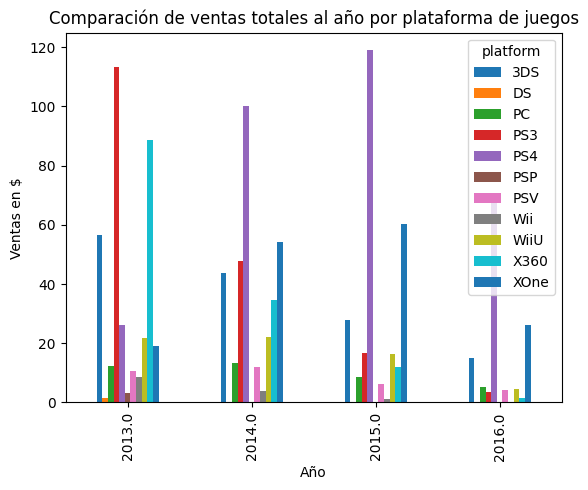

In [14]:
#plataformas con mayor volumen de ventas totales
lideres_ventas=juegos2013_2016.groupby(["platform", "year_of_release"])["ventas_totales"].sum().sort_values(ascending=False).reset_index()
print(lideres_ventas)
tabla_pivot = lideres_ventas.pivot(index="year_of_release", columns="platform", values="ventas_totales")
tabla_pivot.plot(kind="bar", title="Comparación de ventas totales al año por plataforma de juegos", xlabel="Año", ylabel="Ventas en $")
plt.show()

**Con ayuda de la grafica anterior, podemos ver que las plataformas con mayor volumen de ventas en los ultimos tres años han sido PS4, XOne, 3DS, PS3. Se reduce PS4 de forma significativa, X360 y aumenta PS4**

   platform  ventas_totales
0       PS4          314.14
1       PS3          181.43
2      XOne          159.32
3       3DS          143.25
4      X360          136.80
5      WiiU           64.63
6        PC           39.43
7       PSV           32.99
8       Wii           13.66
9       PSP            3.50
10       DS            1.54


<AxesSubplot:xlabel='platform', ylabel='ventas_totales'>

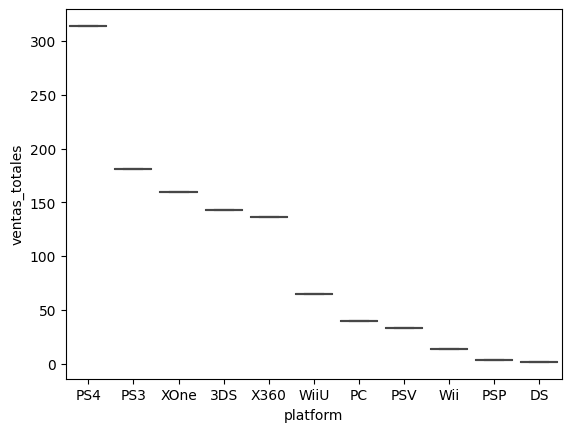

In [15]:
#diagrama de caja para ventas totales por plataforma 
ventas_totales_ultimos_años=juegos2013_2016.groupby("platform")["ventas_totales"].sum().sort_values(ascending=False).reset_index()
print(ventas_totales_ultimos_años)

import seaborn as sns
sns.boxplot(x="platform", y="ventas_totales", data=ventas_totales_ultimos_años)

**Las diferencias en ventas no son significativas entre los grupos de plataformas PS3, XOne, 3DS y X360
Lo mismo ocurre entre Wii, PSP y DS**

**La plataforma que mas ventas ha tenido es PS4 muy por encima de las otras plataformas**

Correlacion entre ventas totales y calificacion de usuarios de PS3 es:  -0.059426363119057066
Correlacion entre ventas totales y calificacion de profesionales de PS3 es:  0.31771301962004556


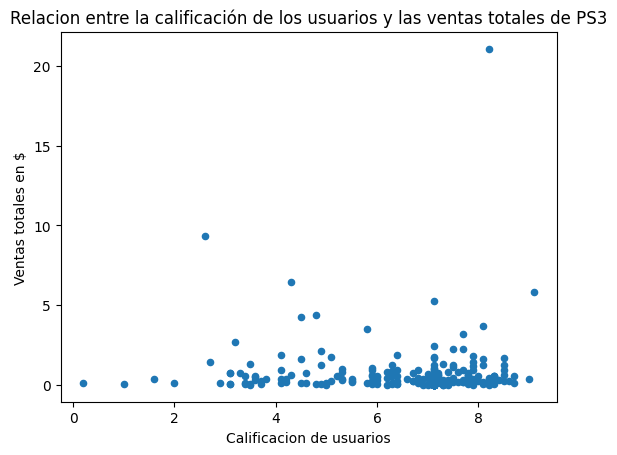

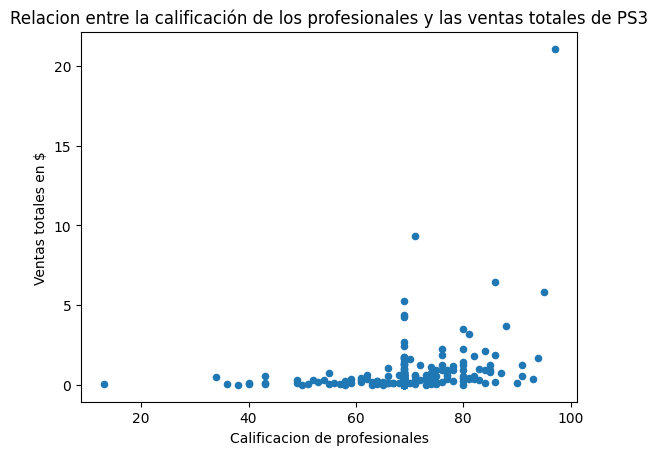

In [16]:
#correlacion entre reseñas de usuarios y profesionales y la plataforma PS3
plataforma_PS3 = juegos2013_2016.query("platform == 'PS3'")
print("Correlacion entre ventas totales y calificacion de usuarios de PS3 es: ",plataforma_PS3["ventas_totales"].corr(plataforma_PS3["user_score"]))
print("Correlacion entre ventas totales y calificacion de profesionales de PS3 es: ",plataforma_PS3["ventas_totales"].corr(plataforma_PS3["critic_score"]))

#grafico de dispersion
plataforma_PS3.plot(kind="scatter", x="user_score", y="ventas_totales", title="Relacion entre la calificación de los usuarios y las ventas totales de PS3", xlabel="Calificacion de usuarios", ylabel="Ventas totales en $")
plataforma_PS3.plot(kind="scatter", x="critic_score", y="ventas_totales", title="Relacion entre la calificación de los profesionales y las ventas totales de PS3", xlabel="Calificacion de profesionales", ylabel="Ventas totales en $")
plt.show()

**La correlacion entre ventas totales y calificacion de usuarios de PS3 es negativa, lo que indica que NO son directamente proporcionales. Cuando aumentan las calificaciones de los usuarios, no aumenta directamente las ventas totales de la plataforma, a diferencia de la correlacion entre las ventas totales y las calificaciones de los profesionales, ya que al ser positiva, nos indica que cuando aumenta la calificacion generada por estos, las ventas totales aumentan.**

                                        name platform  ventas_totales
0                         Grand Theft Auto V      PS3           21.05
1                         Grand Theft Auto V     X360           16.27
2                  Call of Duty: Black Ops 3      PS4           14.63
3                        Pokemon X/Pokemon Y      3DS           14.60
4                         Grand Theft Auto V      PS4           12.62
5  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS           11.68
6                       Call of Duty: Ghosts     X360           10.24
7                       Call of Duty: Ghosts      PS3            9.36
8                                  Minecraft     X360            9.18
9                                    FIFA 16      PS4            8.58


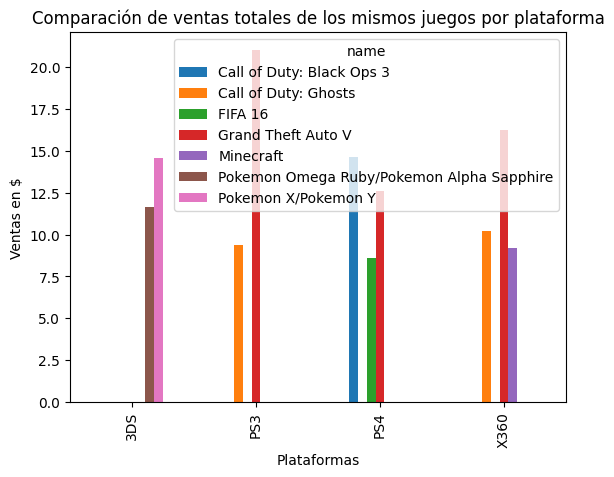

In [17]:
#comparar top 10 de los mismos juegos en diferentes plataformas 
comparativo_juegos=juegos2013_2016.groupby(["name", "platform"])["ventas_totales"].sum().sort_values(ascending=False).reset_index()
top_10_comparativo_juegos=comparativo_juegos[0:10]
print(top_10_comparativo_juegos)
tabla_pivot = top_10_comparativo_juegos.pivot(index="platform", columns="name", values="ventas_totales")
tabla_pivot.plot(kind="bar", title="Comparación de ventas totales de los mismos juegos por plataforma", xlabel="Plataformas", ylabel="Ventas en $")
plt.show()

**Comparando el top 10 de los juegos con mayor volumen de ventas en las diferentes plataformas, podemos ver que Grand Theft Auto V es el pionero en la plataforma PS3 y x360 y curiosamente no lo es en la plataforma mas nueva de la misma compañia PS4. En esta ultima se destaca mas el juego Call of duty: Black ops 3**

           genre  ventas_totales
0         Action          321.87
1        Shooter          232.98
2         Sports          150.65
3   Role-Playing          145.89
4           Misc           62.82
5       Platform           42.63
6         Racing           39.89
7       Fighting           35.31
8      Adventure           23.64
9     Simulation           21.76
10      Strategy           10.08
11        Puzzle            3.17


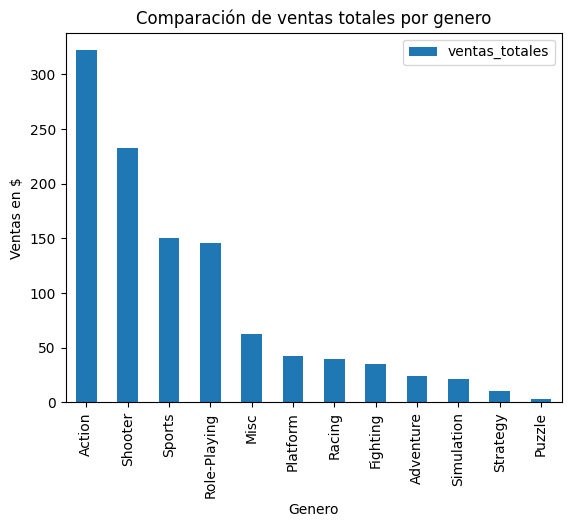

In [18]:
#distribucion de los juegos por genero 
juegos_xgenero=juegos2013_2016.groupby("genre")["ventas_totales"].sum().sort_values(ascending=False).reset_index()
print(juegos_xgenero)
#grafica de barras comparando generos vs ventas totales
juegos_xgenero.plot(kind="bar", title="Comparación de ventas totales por genero", xlabel="Genero", ylabel="Ventas en $", x="genre", y="ventas_totales")
plt.show()

**Los generos mas rentables son Action, Shooter, Sports, Role -Playing y Misc. Por el contrario, los generos con menos ventas son Puzzle y Strategy**

### Etapa 4: Perfil de usuario por cada region 

#### Region NA 

In [28]:
#Top de plataformas principales 
plataformas_na=juegos2013_2016.groupby("platform")["na_sales", "ventas_totales"].sum().sort_values(by="na_sales", ascending=False).reset_index()

#cuota de mercado NA
plataformas_na["cuota_na"]=plataformas_na["na_sales"]/plataformas_na["ventas_totales"]
print(plataformas_na)

   platform  na_sales  ventas_totales  cuota_na
0       PS4    108.74          314.14  0.346151
1      XOne     93.12          159.32  0.584484
2      X360     81.66          136.80  0.596930
3       PS3     63.50          181.43  0.349997
4       3DS     38.20          143.25  0.266667
5      WiiU     29.21           64.63  0.451957
6        PC     11.11           39.43  0.281765
7       Wii      6.56           13.66  0.480234
8       PSV      5.04           32.99  0.152774
9        DS      0.57            1.54  0.370130
10      PSP      0.00            3.50  0.000000


Las 5 principales plataformas en NA son: PS4, Xone, X360, PS3 y 3DS con respecto a el volumen de ventas en esa region 

In [30]:
#Top generos principales en NA
generos_na= juegos2013_2016.groupby("genre")["na_sales"].sum().sort_values(ascending=False).reset_index()
print(generos_na)

           genre  na_sales
0         Action    126.05
1        Shooter    109.74
2         Sports     65.27
3   Role-Playing     46.40
4           Misc     27.49
5       Platform     18.14
6       Fighting     15.55
7         Racing     12.96
8      Adventure      7.14
9     Simulation      4.86
10      Strategy      3.28
11        Puzzle      0.83


Las 5 principales generos en NA son: Action, Shooter, Sports, Role-Playing y Misc con respecto a el volumen de ventas en esa region 

In [67]:
#relacion entre rating y ventas en NA con prueba ANOVA que consulte que sirve para ver si las diferencias son significativas

#Agrupar y calcular la media de ventas por ESRB en cada región
ventas_por_rating = juegos2013_2016.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].mean().reset_index()
print(ventas_por_rating)

from scipy.stats import f_oneway

# Separar ventas NA por grupo ESRB
grupos_na = [grupo['na_sales'].dropna() for _, grupo in juegos2013_2016.groupby('rating')]
f_stat, p_valor = f_oneway(*grupos_na)

print(f"Valor p: {p_valor}")
if p_valor < 0.05:
    print("La clasificación ESRB afecta significativamente las ventas en NA")
else:
    print("No hay evidencia de que la clasificación ESRB afecte las ventas en NA")


  rating  na_sales  eu_sales  jp_sales
0      E  0.131720  0.126873  0.078335
1   E10+  0.215238  0.169405  0.023373
2      M  0.447724  0.393821  0.038238
3      T  0.149520  0.125976  0.061832
Valor p: 1.289833092287197e-21
La clasificación ESRB afecta significativamente las ventas en NA


#### Region EU

In [35]:
#Top de plataformas principales EU
plataformas_eu=juegos2013_2016.groupby("platform")["eu_sales", "ventas_totales"].sum().sort_values(by="eu_sales", ascending=False).reset_index()

#cuota de mercado EU
plataformas_eu["cuota_eu"]=plataformas_eu["eu_sales"]/plataformas_eu["ventas_totales"]
print(plataformas_eu)

   platform  eu_sales  ventas_totales  cuota_eu
0       PS4    141.09          314.14  0.449131
1       PS3     67.81          181.43  0.373753
2      XOne     51.59          159.32  0.323814
3      X360     42.52          136.80  0.310819
4       3DS     30.96          143.25  0.216126
5        PC     25.36           39.43  0.643165
6      WiiU     19.85           64.63  0.307133
7       PSV      6.10           32.99  0.184905
8       Wii      5.93           13.66  0.434114
9        DS      0.85            1.54  0.551948
10      PSP      0.17            3.50  0.048571


Las 5 principales plataformas en EU son: PS4, PS3, XOne, X360 y 3DS con respecto a el volumen de ventas en esa region.

In [40]:
#Top generos principales en EU
generos_eu= juegos2013_2016.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).reset_index()
print(generos_eu)

           genre  eu_sales
0         Action    118.13
1        Shooter     87.86
2         Sports     60.52
3   Role-Playing     36.97
4         Racing     20.19
5           Misc     20.04
6       Platform     15.58
7     Simulation     10.92
8       Fighting      8.55
9      Adventure      8.25
10      Strategy      4.22
11        Puzzle      1.00


Las 5 principales generos en EU son: Action, Shooter, Sports, Role-Playing y Racing con respecto a el volumen de ventas en esa region

In [69]:
#relacion entre rating y ventas en EU con prueba ANOVA que consulte que sirve para ver si las diferencias son significativas

from scipy.stats import f_oneway

# Separar ventas EU por grupo ESRB
grupos_eu = [grupo['eu_sales'].dropna() for _, grupo in juegos2013_2016.groupby('rating')]
f_stat, p_valor = f_oneway(*grupos_eu)

print(f"Valor p: {p_valor}")
if p_valor < 0.05:
    print("La clasificación ESRB afecta significativamente las ventas en EU")
else:
    print("No hay evidencia de que la clasificación ESRB afecte las ventas en EU")

Valor p: 6.720091141112694e-18
La clasificación ESRB afecta significativamente las ventas en EU


#### Region JP

In [39]:
#Top de plataformas principales JP
plataformas_jp=juegos2013_2016.groupby("platform")["jp_sales", "ventas_totales"].sum().sort_values(by="jp_sales", ascending=False).reset_index()

#cuota de mercado JP
plataformas_jp["cuota_jp"]=plataformas_jp["jp_sales"]/plataformas_jp["ventas_totales"]
print(plataformas_jp)

   platform  jp_sales  ventas_totales  cuota_jp
0       3DS     67.81          143.25  0.473368
1       PS3     23.35          181.43  0.128700
2       PSV     18.59           32.99  0.563504
3       PS4     15.96          314.14  0.050805
4      WiiU     10.88           64.63  0.168343
5       PSP      3.29            3.50  0.940000
6      X360      0.51          136.80  0.003728
7      XOne      0.34          159.32  0.002134
8       Wii      0.05           13.66  0.003660
9        DS      0.00            1.54  0.000000
10       PC      0.00           39.43  0.000000


Las 5 principales plataformas en JP son: 3DS, PS3, PSV, PS4 y WiiU con respecto a el volumen de ventas en esa region.

In [41]:
#Top generos principales en JP
generos_jp= juegos2013_2016.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).reset_index()
print(generos_jp)

           genre  jp_sales
0   Role-Playing     51.04
1         Action     40.49
2           Misc      9.20
3       Fighting      7.65
4        Shooter      6.61
5      Adventure      5.82
6         Sports      5.41
7       Platform      4.79
8     Simulation      4.52
9         Racing      2.30
10      Strategy      1.77
11        Puzzle      1.18


Las 5 principales generos en JP son: Role-Playing, Action, Misc, Fighting, Shooter y Adventure con respecto a el volumen de ventas en esa region

In [70]:
#relacion entre rating y ventas en JP con prueba ANOVA 

from scipy.stats import f_oneway

# Separar ventas EU por grupo ESRB
grupos_jp = [grupo['jp_sales'].dropna() for _, grupo in juegos2013_2016.groupby('rating')]
f_stat, p_valor = f_oneway(*grupos_jp)

print(f"Valor p: {p_valor}")
if p_valor < 0.05:
    print("La clasificación ESRB afecta significativamente las ventas en JP")
else:
    print("No hay evidencia de que la clasificación ESRB afecte las ventas en JP")

Valor p: 0.0007392126070138082
La clasificación ESRB afecta significativamente las ventas en JP


**Conclusiones Generales:** El top 5 de plataformas y generos en NA y EU son muy similares por no decir iguales, a diferencia de la region de JP donde el Top varia significativamente. En cuanto a la cuota de mercado que tiene cada plataforma en cada region, se puede ver que las plataformas de Xbox tiene mas cuota de mercado en NA, a diferencia de EU, donde PC y DS tienen la mayor cuota de mercado. En JP mayor cuota de mercado la tiene la plataforma PSP. 

En cuanto a la calificacion ESRB afecta en todas regiones significativamente las ventas segun las pruebas estadisticas aplicadas (ANOVA)

### Etapa 5: Prueba de hipotesis 

In [58]:
#Hipotesis nula: Las calificaciones promedio de los usuarios de Xbox One y PC son las mismas
#Hipotesis alternativa: Las calificaciones promedio de los usuarios de Xbox One y PC son diferentes 

juegos_xone=juegos2013_2016.query("platform =='XOne'")
juegos_pc=juegos2013_2016.query("platform == 'PC'")

# Extraer las columnas numéricas y eliminar NaNs
xone_scores = juegos_xone["user_score"].dropna()
pc_scores = juegos_pc["user_score"].dropna()

# Prueba de Levene sobre varianzas
stat, p = levene(xone_scores, pc_scores)

if p < 0.05:
    print("Se rechaza H0: Las varianzas son significativamente diferentes")
else:
    print("No se rechaza H0: Las varianzas son iguales")

#prueba de hipotesis de dos colas ya que la Hipotesis no refiere que sea mayor o menor que el promedio de la otra poblacion 
#el valor de equal_val lo dejo en False porque la prueba Levene arrojo que las varianzas son significativamente diferentes
alpha = 0.05
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Se rechaza H0: Las varianzas son significativamente diferentes
valor p: 0.06817560404247579
No se puede rechazar la hipótesis nula: no hay diferencia significativa.


**Teniendo en cuenta el resultado de la prueba, se podria concluir que las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.**

In [61]:
#Hipotesis nula: Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son iguales
#Hipotesis alternativa: Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes

juegos_action=juegos2013_2016.query("genre =='Action'")
juegos_sports=juegos2013_2016.query("genre == 'Sports'")

# Extraer las columnas numéricas y eliminar NaNs
action_scores = juegos_action["user_score"].dropna()
sports_scores = juegos_sports["user_score"].dropna()

# Prueba de Levene sobre varianzas
stat, p = levene(action_scores, sports_scores)

if p < 0.05:
    print("Se rechaza H0: Las varianzas son significativamente diferentes")
else:
    print("No se rechaza H0: Las varianzas son iguales")

#prueba de hipotesis de dos colas ya que la Hipotesis no refiere que sea mayor o menor que el promedio de la otra poblacion
#el valor de equal_val lo dejo en False porque la prueba Levene arrojo que las varianzas son significativamente diferentes
alpha = 0.05
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de los usuarios de los generos Accion y Deportes son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

Se rechaza H0: Las varianzas son significativamente diferentes
valor p: 1.4084155169856942e-20
Se rechaza la hipótesis nula: Las calificaciones promedio de los usuarios de los generos Accion y Deportes son diferentes.


**Teniendo en cuenta el resultado de la prueba, se podria concluir que las calificaciones promedio de los usuarios de los generos de Accion y deportes son diferentes**

### Conclusion general: 

1. Plataformas dominantes
PS4, PS3, XOne, 3DS y X360 concentran la mayor parte de las ventas recientes.
PS4 lidera en ventas totales con 314.14 millones, seguida por PS3 y XOne.
Muchas plataformas ya no son relevantes (ej. DS, PSP, Wii).

Proyección 2017: 

PS4 y XOne seguirán dominando, pero se espera una caída de PS3 y X360, ya en declive por obsolescencia.
Las plataformas con buena cuota en varias regiones (como PS4 y 3DS) tienen ventaja. PC tiene fuerte presencia en Europa pero es irrelevante en Japón.
Action, Shooter y Sports son los más populares en todas las regiones.
Enfocar lanzamientos en géneros Action, Shooter, Sports, y RPG para Japón maximiza ventas.
Ajustar estrategias por región, especialmente Japón vs resto del mundo.
Considerar calificaciones de críticos como factor de marketing y confianza.

